In [38]:
%matplotlib inline
import csv
import numpy
import pandas
import matplotlib.pyplot as plt
from sklearn import cluster, metrics

In [39]:
SEED = 0
RS = numpy.random.RandomState(numpy.random.MT19937(numpy.random.SeedSequence(SEED)))

In [40]:
def get_all_pairs(up):
    all_pairs = []
    for i in range(up):
        all_pairs.extend([(i, j) for j in range(i+1, up)])
    return all_pairs

In [41]:
def relabel_clusters_size(cluster_labels):
    counts = numpy.bincount(cluster_labels+1)
    count_outliers = counts[0]
    count_clust = counts[1:]
    relabel_map = -numpy.ones(len(counts), dtype=int)
    relabel_map[numpy.argsort(-count_clust)] = numpy.arange(len(count_clust), dtype=int)
    return relabel_map[cluster_labels], relabel_map

In [42]:
data = pandas.read_csv("dispersion_100_results.csv")
data

,subject_id,MFD_true,MFD_SD_true,MFD_false,MFD_SD_false,MSA_true,MSA_SD_true,MSA_false,MSA_SD_false,MFD_overall,MFD_overall_SD,MSA_overall,MSA_overall_SD
0,s2,3.725000,1.041208,4.074353,1.312509,3.665876,4.668020,3.588527,8.045168,3.899676,1.176859,3.627202,6.356594
1,s4,4.156300,1.727640,3.744739,1.605291,1.300345,2.407898,1.032072,2.261558,3.950520,1.666465,1.166208,2.334728
2,s8,2.780000,0.560233,2.521857,0.385891,1.040624,1.182501,0.064129,0.157084,2.650929,0.473062,0.552377,0.669793
3,s10,3.698333,0.440955,3.327909,0.614103,0.273666,0.387022,1.614359,2.624017,3.513121,0.527529,0.944012,1.505519
4,s16,5.145333,1.774336,3.707200,0.844720,1.641717,1.693089,0.000000,0.000000,4.426267,1.309528,0.820859,0.846545
5,s22,2.210250,0.157486,2.133545,0.103676,1.182250,0.766694,0.000000,0.000000,2.171898,0.130581,0.591125,0.383347
6,s23,2.606000,0.506437,2.418273,0.369989,0.000000,0.000000,0.866915,1.856073,2.512136,0.438213,0.433458,0.928037
7,s30,3.212800,0.727081,4.027385,1.266814,0.577547,0.849931,1.388918,2.258187,3.620092,0.996947,0.983232,1.554059


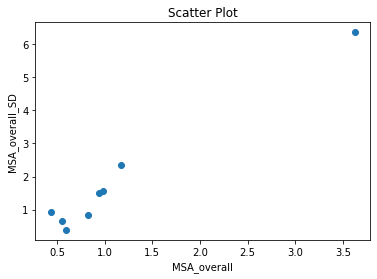

In [43]:

plt.scatter(data['MSA_overall'], data['MSA_overall_SD'])
 

plt.title("Scatter Plot")
 

plt.xlabel('MSA_overall')
plt.ylabel('MSA_overall_SD')
 
plt.show()

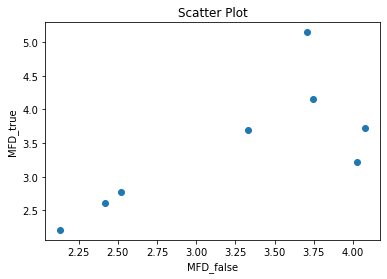

In [44]:

plt.scatter(data['MFD_false'], data['MFD_true'])
 

plt.title("Scatter Plot")
 

plt.xlabel('MFD_false')
plt.ylabel('MFD_true')
 
plt.show()

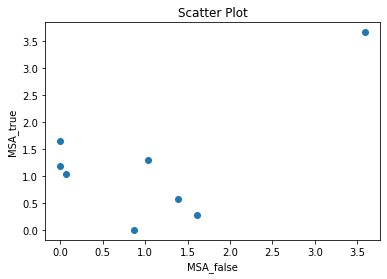

In [45]:
plt.scatter(data['MSA_false'], data['MSA_true'])
 

plt.title("Scatter Plot")
 

plt.xlabel('MSA_false')
plt.ylabel('MSA_true')
 
plt.show()

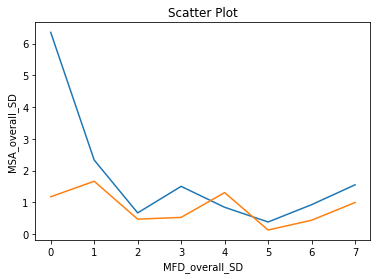

In [46]:
# Scatter plot
plt.plot(data['MSA_overall_SD'])
plt.plot(data['MFD_overall_SD'])
 

plt.title("Scatter Plot")
 

plt.xlabel('MFD_overall_SD')
plt.ylabel('MSA_overall_SD')
 
plt.show()

Text(0, 0.5, 'Mean Fixation Duration')

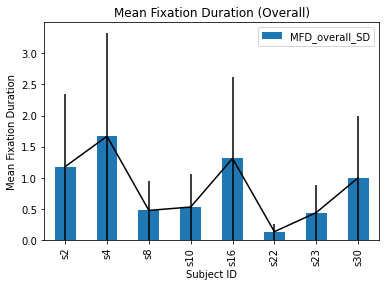

In [47]:

plotdata = pandas.DataFrame({
    "MFD_overall_SD":data.MFD_overall_SD.values,
    }, 
    index = data.subject_id
)
plotdata.plot(kind="bar")
plt.errorbar(plotdata.index, data.MFD_overall_SD.values, yerr=data.MFD_overall_SD.values, color="black")
plt.title("Mean Fixation Duration (Overall)")
plt.xlabel("Subject ID")
plt.ylabel("Mean Fixation Duration")

#

Text(0, 0.5, 'Mean Saccade Amplitude')

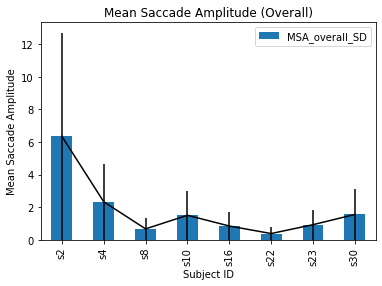

In [48]:
#
plotdata = pandas.DataFrame({
    "MSA_overall_SD":data.MSA_overall_SD.values,
    }, 
    index = data.subject_id
)
plotdata.plot(kind="bar")
plt.errorbar(plotdata.index, data.MSA_overall_SD.values, yerr=data.MSA_overall_SD.values, color="black")
plt.title("Mean Saccade Amplitude (Overall)")
plt.xlabel("Subject ID")
plt.ylabel("Mean Saccade Amplitude")
#

Text(0, 0.5, 'Mean Saccade Amplitudes [ms]')

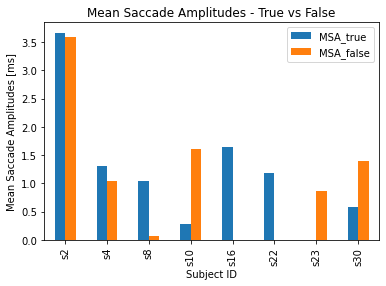

In [49]:
#
plotdata = pandas.DataFrame({
    "MSA_true":data.MSA_true.values,
    "MSA_false":data.MSA_false.values,
    }, 
    index = data.subject_id
)
plotdata.plot(kind="bar")
plt.title("Mean Saccade Amplitudes - True vs False")
plt.xlabel("Subject ID")
plt.ylabel("Mean Saccade Amplitudes [ms]")

Text(0, 0.5, 'Mean Saccade Amplitudes [ms]')

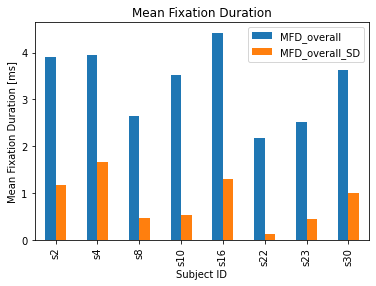

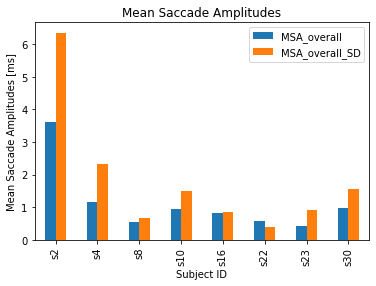

In [50]:
# Bar plots 
plotdata = pandas.DataFrame({
    "MFD_overall":data.MFD_overall.values,
    "MFD_overall_SD":data.MFD_overall_SD.values
    }, 
    index = data.subject_id
)
plotdata.plot(kind="bar")
plt.title("Mean Fixation Duration")
plt.xlabel("Subject ID")
plt.ylabel("Mean Fixation Duration [ms]")

#
plotdata = pandas.DataFrame({
    "MSA_overall":data.MSA_overall.values,
    "MSA_overall_SD":data.MSA_overall_SD.values,
    }, 
    index = data.subject_id
)
plotdata.plot(kind="bar")
plt.title("Mean Saccade Amplitudes")
plt.xlabel("Subject ID")
plt.ylabel("Mean Saccade Amplitudes [ms]")

#

Text(0, 0.5, 'Mean Fixation Duration')

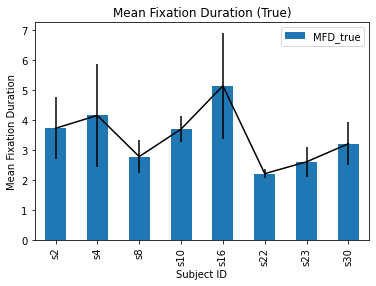

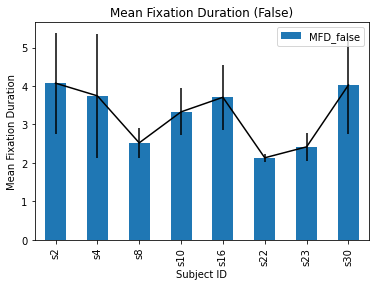

In [51]:
plotdata = pandas.DataFrame({
    "MFD_true":data.MFD_true.values,
    }, 
    index = data.subject_id
)
plotdata.plot(kind="bar")
plt.errorbar(plotdata.index, data.MFD_true.values, yerr=data.MFD_SD_true.values, color="black")
plt.title("Mean Fixation Duration (True)")
plt.xlabel("Subject ID")
plt.ylabel("Mean Fixation Duration")

plotdata = pandas.DataFrame({
    "MFD_false":data.MFD_false.values,
    }, 
    index = data.subject_id
)
plotdata.plot(kind="bar")
plt.errorbar(plotdata.index, data.MFD_false.values, yerr=data.MFD_SD_false.values, color="black")
plt.title("Mean Fixation Duration (False)")
plt.xlabel("Subject ID")
plt.ylabel("Mean Fixation Duration")

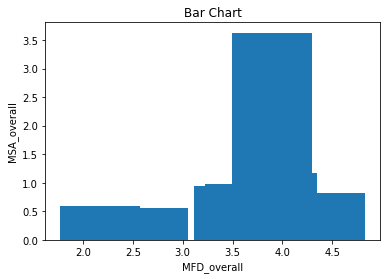

In [52]:

# Bar chart
plt.bar(data['MFD_overall'], data['MSA_overall'])
 
plt.title("Bar Chart")
 

plt.xlabel('MFD_overall')
plt.ylabel('MSA_overall')
 
# Adding the legends
plt.show()

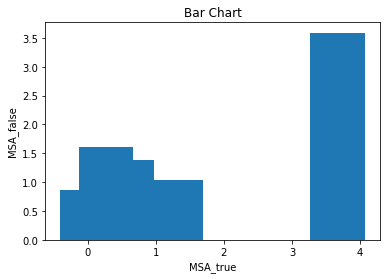

In [53]:
# Bar chart
plt.bar(data['MSA_true'], data['MSA_false'])
 
plt.title("Bar Chart")
 
# Setting the X and Y labels
plt.xlabel('MSA_true')
plt.ylabel('MSA_false')

plt.show()

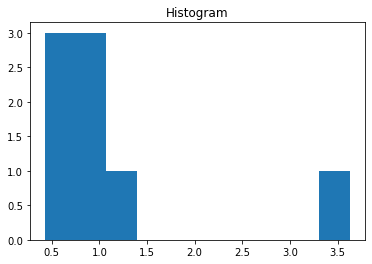

In [54]:
# histogram
plt.hist(data['MSA_overall'])
 
plt.title("Histogram")
 
plt.show()

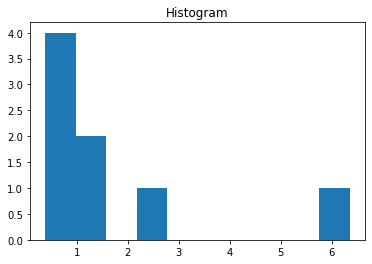

In [55]:
# histogram
plt.hist(data['MSA_overall_SD'])
 
plt.title("Histogram")
 
plt.show()

In [56]:

# importing packages
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

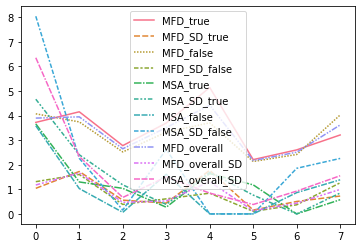

In [57]:

sns.lineplot(data=data.drop(['MSA_overall'], axis=1))
plt.show()

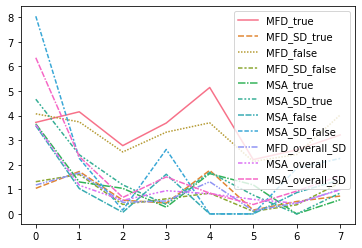

In [58]:
sns.lineplot(data=data.drop(['MFD_overall'], axis=1))
plt.show()

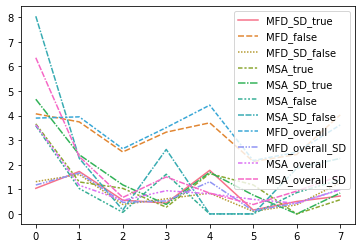

In [59]:
sns.lineplot(data=data.drop(['MFD_true'], axis=1))
plt.show()

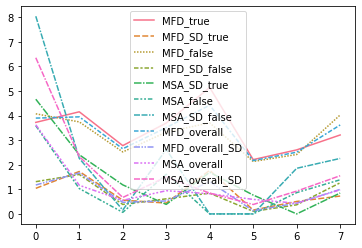

In [60]:
sns.lineplot(data=data.drop(['MSA_true'], axis=1))
plt.show()

<AxesSubplot:xlabel='MSA_overall', ylabel='MSA_overall_SD'>

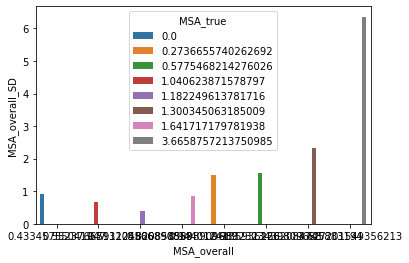

In [69]:
sns.barplot(x='MSA_overall', y='MSA_overall_SD', hue='MSA_true', data=data)

<AxesSubplot:xlabel='MFD_overall', ylabel='MFD_overall_SD'>

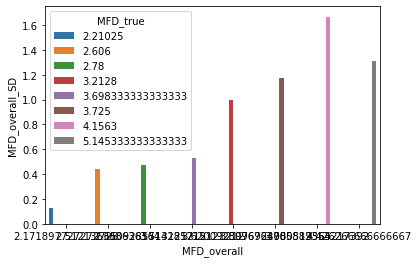

In [70]:
sns.barplot(x='MFD_overall', y='MFD_overall_SD', hue='MFD_true', data=data)

<AxesSubplot:xlabel='MFD_overall', ylabel='MFD_true'>

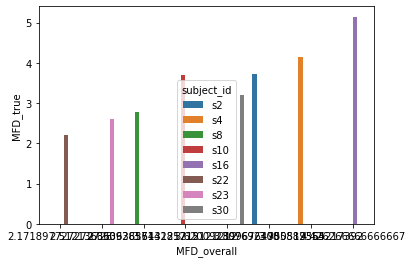

In [72]:
sns.barplot(x='MFD_overall', y='MFD_true', hue='subject_id', data=data)

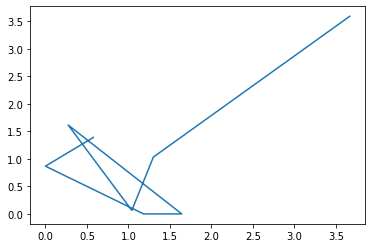

In [73]:
plt.plot(data.MSA_true, data.MSA_false)

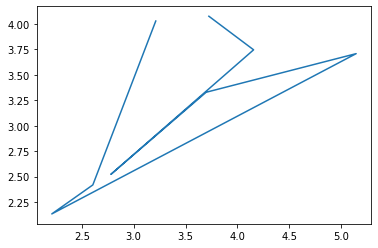

In [74]:
plt.plot(data.MFD_true, data.MFD_false)

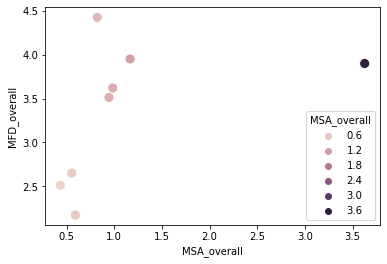

In [82]:
sns.scatterplot(x=data.MSA_overall, y=data.MFD_overall, hue=data.MSA_overall, s=100);

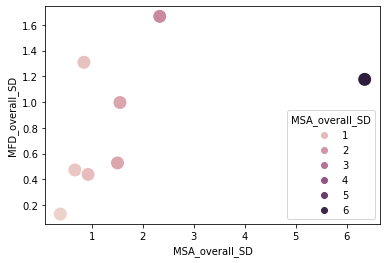

In [81]:
sns.scatterplot(x=data.MSA_overall_SD, y=data.MFD_overall_SD, hue=data.MSA_overall_SD, s=200);

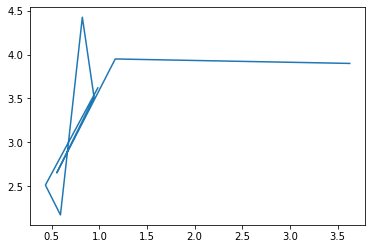

In [75]:
plt.plot(data.MSA_overall, data.MFD_overall)